In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from copy import deepcopy

from scipy.interpolate import interp1d
from astropy.cosmology import FlatLambdaCDM
import statistics as stats
from scipy.interpolate import interp1d
from scipy.stats import gaussian_kde

import semlinlens as lens
import func_get_h_eta as h_eta
import func_get_rel as rel

In [5]:
plt.rcParams.update({'font.size': 16, 'text.usetex': False})
n_samples = 10

In [7]:
dpi_set=400
cosmo = FlatLambdaCDM(H0=100,Om0=0.315)
#%matplotlib inline 
folder = './'#circ-shear-nburn4000-nwalkers30/'#'/home/dilys/Projects/h-eta/quad_ellip/' '/home/dilys/Projects/h-eta/circ-shear-nburn4000-nwalkers30/'
root = 'mock_'#'mock_ellip'#'mock_quad_shear0,2_eta1,0_config'
color='blue'

files_dat = []
files_txt = []
for n in range(0,n_samples):
    files_dat.append(folder+root+str(n+1)+'.dat')
    files_txt.append(folder+root+str(n+1)+'.txt')

In [8]:
totalmag, peakmag, Rij, tau12, tau13, tau14, tau23, tau24, tau34, time_max, time_min, annulus_length = rel.get_info(files_dat)
print(annulus_length)

totalmag, peakmag, Rij, tau12, tau13, tau14, tau23, tau24, tau34, time_max, time_min, annulus_length
[0.51870838 0.49019837 0.51712843 0.51179504 0.47188847 0.51893673
 0.45875919 0.47389244 0.45129735 0.56302689]


median is: 0.5009967072776027
lowercut, uppercut
0.46652481570525856 0.5354685988499468
mock lenses (lens ID) ordered by annulus lengths (least to greatest)
[ 9  7  5  8  2  4  3  1  6 10]


Text(0.5, 0, 'lens ID')

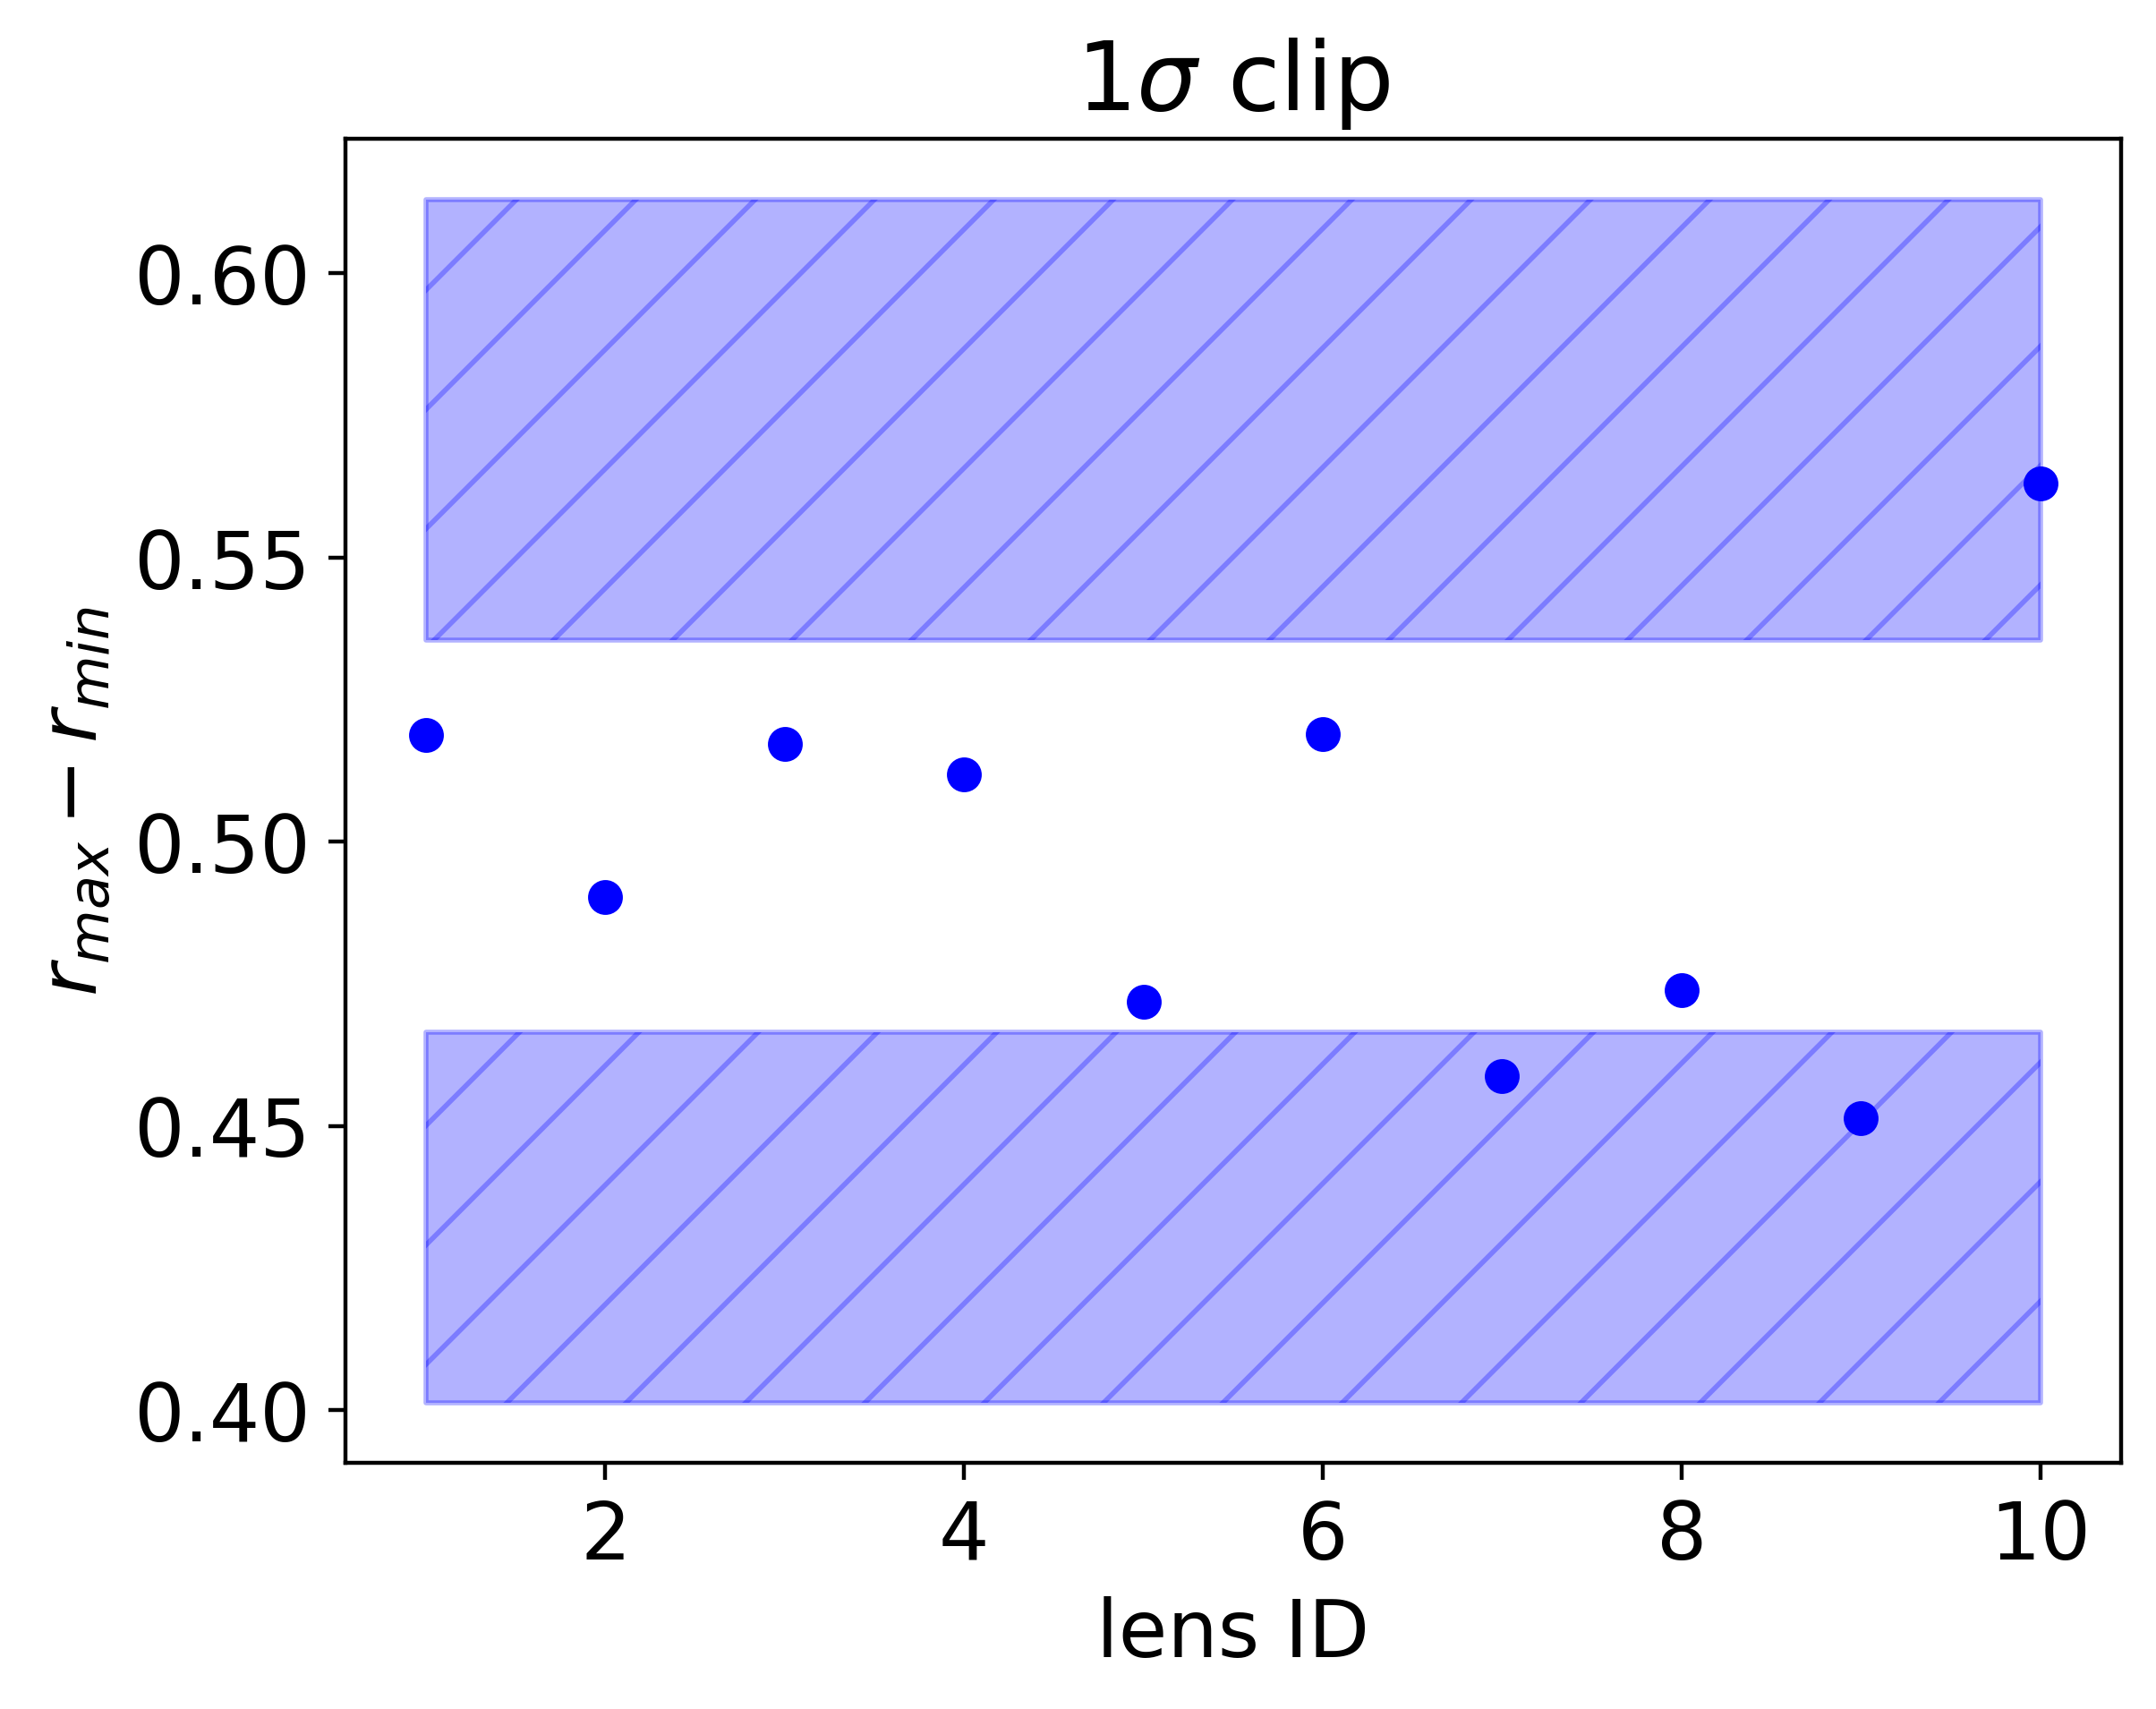

In [19]:
med = stats.median(annulus_length)
print('median is: '+str(med))
error = (stats.stdev(annulus_length))

### set the sigma cutoff in the annulus length
n_sigma = 1
uppercut = med + n_sigma*error
lowercut = med - n_sigma*error
print('lowercut, uppercut')
print(lowercut, uppercut)

flags = []
for n in range(0,n_samples):
    if annulus_length[n] <= lowercut or annulus_length[n] >= uppercut:
        flags.append(False)
    else:
        flags.append(True)
print('mock lenses (lens ID) ordered by annulus lengths (least to greatest)')
print(np.argsort(annulus_length)+1)

x = np.arange(1,n_samples+1)
y = annulus_length
plt.figure(dpi=dpi_set)
plt.plot(x,y, linestyle='', marker='o', color='blue', rasterized = True)
plt.fill_between(x, y1=np.min(annulus_length)-0.05, y2=med-(n_sigma*error), alpha=0.3, hatch='/', color='blue')
plt.fill_between(x, y1=med+(n_sigma*error), y2 = np.max(annulus_length)+0.05, alpha=0.3, hatch='/', color='blue')

plt.title(str(n_sigma)+'$\sigma$ clip')
plt.ylabel('$r_{max}-r_{min}$')
plt.xlabel('lens ID')


Text(0, 0.5, 'prob density function')

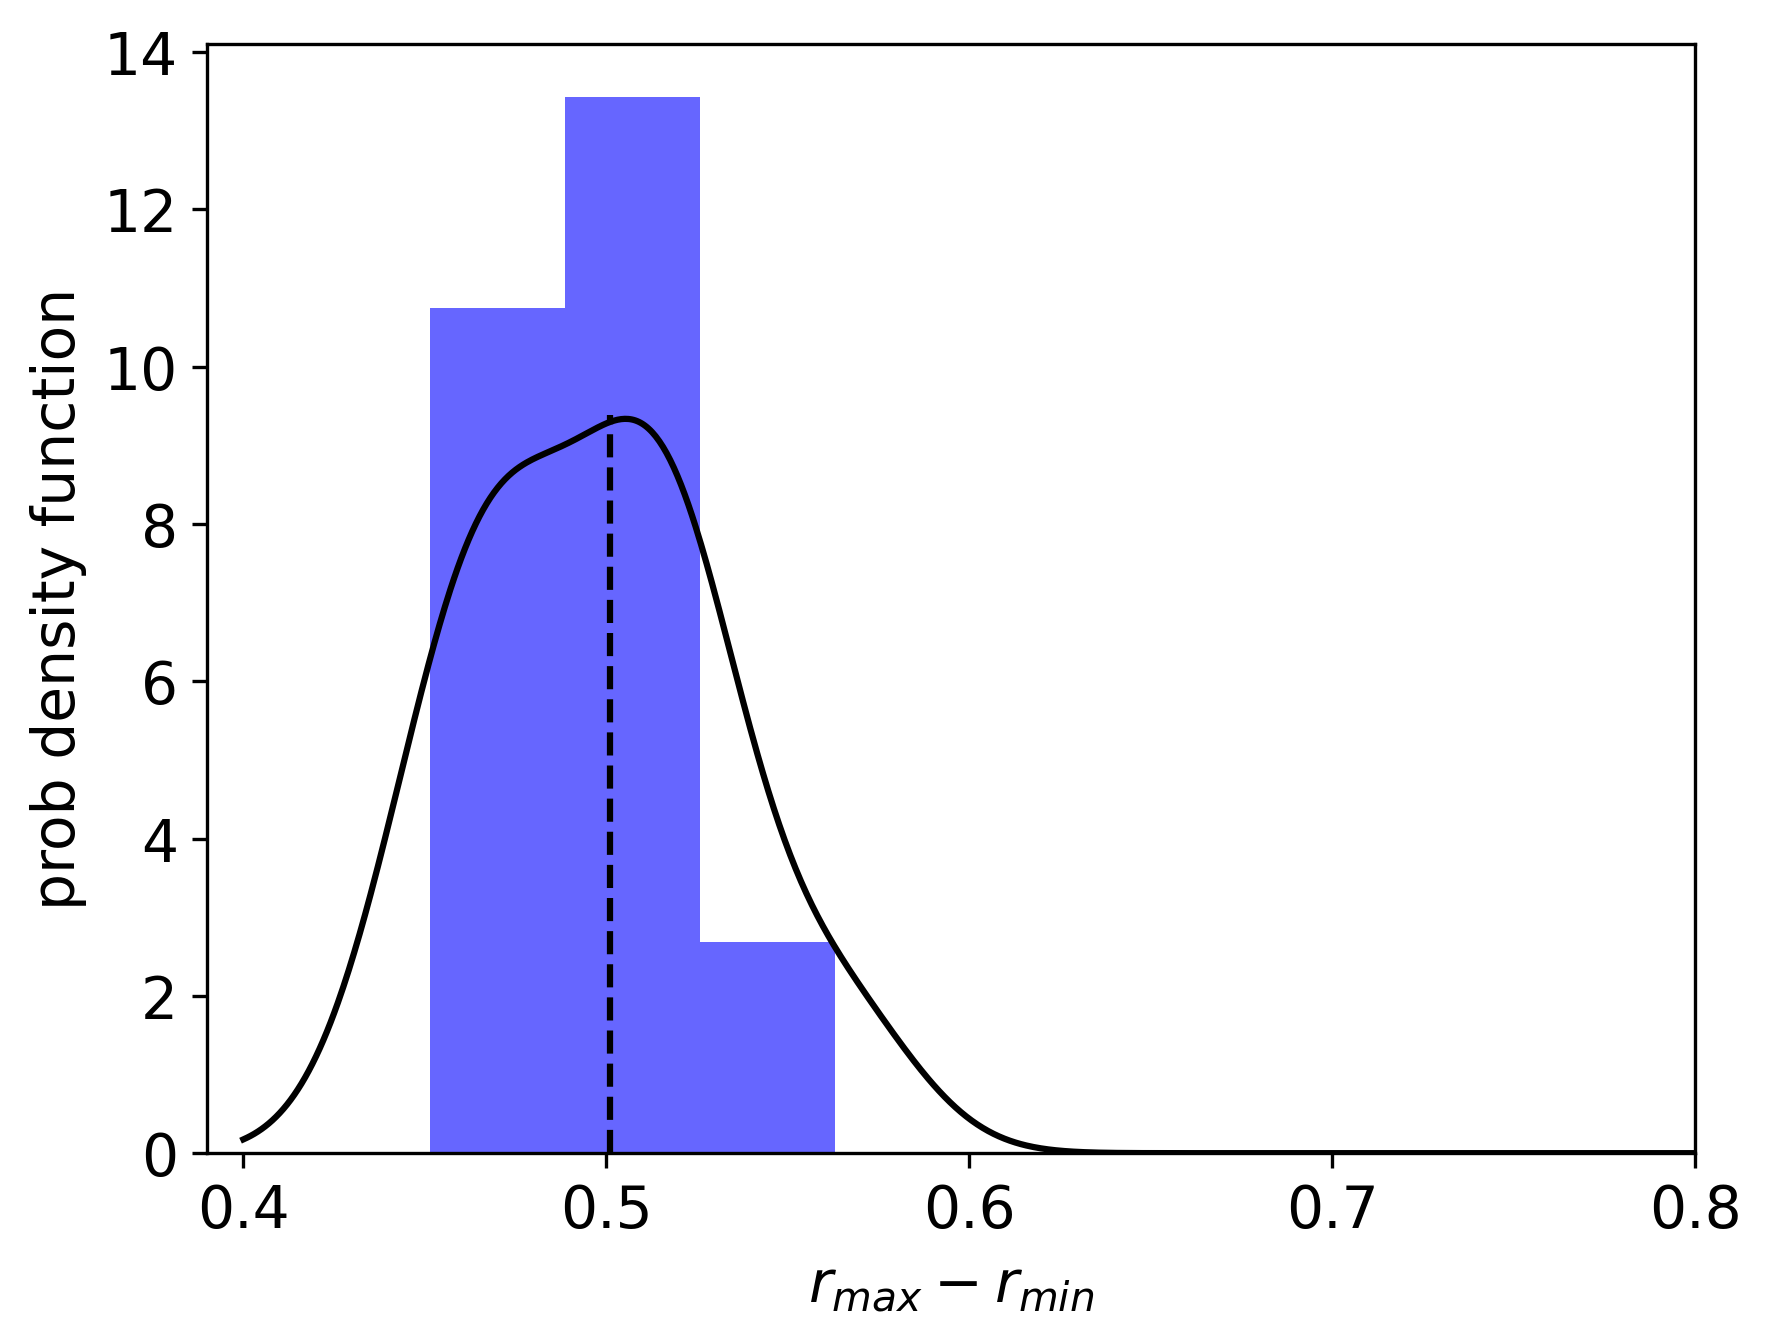

In [33]:
plt.figure(dpi=300)
bin_num = 3
plt.rcParams.update({'font.size': 14, 'text.usetex': False})
plt.rc('axes', labelsize=14)
plt.hist(annulus_length, density = True, alpha=0.6, color=color, bins=bin_num)
kde_func = gaussian_kde(annulus_length)
med = stats.median(annulus_length)
error = (stats.stdev(annulus_length))
n_sigma = 0.5

x_in = np.linspace(0.4,0.9, 1000)
kde_pdf = kde_func(x_in)
y_in = np.linspace(0,8,1000)

plt.plot([med]*2, [0,np.max(kde_pdf)+0.05], color='black', linestyle='--')
plt.plot(x_in, kde_pdf, 'black', label='kde')
plt.xlim([0.39,0.8])
plt.xlabel('$r_{max}-r_{min}$')
plt.ylabel('prob density function')